In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import random
import seaborn as sns
import datetime
from collections import Counter
import warnings
import json
import wordcloud

In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
csvfile = "new data/merged_final2.csv"
csvfile2 = "new data/2020_data_id.csv"
csvfile3 = "new data/2022_data_id.csv"
df = pd.read_csv(csvfile)
df_2020 = pd.read_csv(csvfile2)
df_2022 = pd.read_csv(csvfile3)

df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,4gr_lUXydH4,Back to Hogwarts Global Celebration 2020 hoste...,2020-09-01T10:24:18Z,UChPRO1CB_Hvd0TvKRU62iSQ,Wizarding World,1,2020-09-01T00:00:00Z,harry potter|wizarding world|back to hogwarts|...,313496,28202,321,888,https://i.ytimg.com/vi/4gr_lUXydH4/default.jpg,False,False,Next stop: Platform Nine and Three-Quarters! J...
1,rRSm5r1Fjrw,Brandy and Monica go head-to-head in Verzuz,2020-09-01T03:13:35Z,UCqISR0F9-nCth-V2r4Qy75Q,REVOLT TV,10,2020-09-01T00:00:00Z,Verzuz|Monica|Brandy|Swizz Beatz|Timbaland|R&B...,270211,15243,481,4457,https://i.ytimg.com/vi/rRSm5r1Fjrw/default.jpg,False,False,One of the fiercest modern day diva showdowns ...
2,jUsUzbmSLow,SuperM 슈퍼엠 ‘호랑이 (Tiger Inside)’ MV,2020-09-01T04:00:11Z,UCEf_Bc-KVd7onSeifS3py9g,SMTOWN,10,2020-09-01T00:00:00Z,[None],4251950,988003,10034,130520,https://i.ytimg.com/vi/jUsUzbmSLow/default.jpg,False,False,SuperM's new single “호랑이 (Tiger Inside)” is ou...
3,U0ivaisQoRI,Dani Mocanu 🍒 Costi - Ciresica | Official Vide...,2020-09-01T07:00:11Z,UC7F3aaccZ4D64ZCrzkCmANw,Dani Mocanu,10,2020-09-01T00:00:00Z,[None],313562,36398,743,1081,https://i.ytimg.com/vi/U0ivaisQoRI/default.jpg,False,False,Pentru evenimente cu Dani Mocanu 📞 +4075531080...
4,EOuLt3WWcY0,When the king takes a piano lesson in medieval...,2020-09-01T03:28:42Z,UCnZx--LpG2spgmlxOcC-DRA,Daniel Thrasher,23,2020-09-01T00:00:00Z,when the student becomes the master|when you f...,428267,62679,176,3821,https://i.ytimg.com/vi/EOuLt3WWcY0/default.jpg,False,False,Go to https://expressvpn.com/thrasher to find ...


In [7]:
GRAPH_COLORS = ["#cb1717", "#e65b5b", "#d485a1", "#a595d3", "#826abe"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('text', color='#282828')
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [6]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,2234.00,2234.00,2234.00,2234.00,2234.00
mean,19.02,999289.59,68020.58,677.38,6280.70
std,6.48,2051133.99,185372.85,2810.55,43651.49
min,1.00,0.00,0.00,0.00,0.00
25%,17.00,197753.00,7193.50,0.00,637.25
50%,20.00,445249.50,20397.50,57.00,1733.00
75%,24.00,967395.50,55447.75,429.50,4400.75
max,29.00,34246212.00,3278984.00,74690.00,1903825.00


In [7]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,4gr_lUXydH4,Back to Hogwarts Global Celebration 2020 hoste...,2020-09-01T10:24:18Z,UChPRO1CB_Hvd0TvKRU62iSQ,Wizarding World,1,2020-09-01T00:00:00Z,harry potter|wizarding world|back to hogwarts|...,313496,28202,321,888,https://i.ytimg.com/vi/4gr_lUXydH4/default.jpg,False,False,Next stop: Platform Nine and Three-Quarters! J...
1,rRSm5r1Fjrw,Brandy and Monica go head-to-head in Verzuz,2020-09-01T03:13:35Z,UCqISR0F9-nCth-V2r4Qy75Q,REVOLT TV,10,2020-09-01T00:00:00Z,Verzuz|Monica|Brandy|Swizz Beatz|Timbaland|R&B...,270211,15243,481,4457,https://i.ytimg.com/vi/rRSm5r1Fjrw/default.jpg,False,False,One of the fiercest modern day diva showdowns ...
2,jUsUzbmSLow,SuperM 슈퍼엠 ‘호랑이 (Tiger Inside)’ MV,2020-09-01T04:00:11Z,UCEf_Bc-KVd7onSeifS3py9g,SMTOWN,10,2020-09-01T00:00:00Z,[None],4251950,988003,10034,130520,https://i.ytimg.com/vi/jUsUzbmSLow/default.jpg,False,False,SuperM's new single “호랑이 (Tiger Inside)” is ou...
3,U0ivaisQoRI,Dani Mocanu 🍒 Costi - Ciresica | Official Vide...,2020-09-01T07:00:11Z,UC7F3aaccZ4D64ZCrzkCmANw,Dani Mocanu,10,2020-09-01T00:00:00Z,[None],313562,36398,743,1081,https://i.ytimg.com/vi/U0ivaisQoRI/default.jpg,False,False,Pentru evenimente cu Dani Mocanu 📞 +4075531080...
4,EOuLt3WWcY0,When the king takes a piano lesson in medieval...,2020-09-01T03:28:42Z,UCnZx--LpG2spgmlxOcC-DRA,Daniel Thrasher,23,2020-09-01T00:00:00Z,when the student becomes the master|when you f...,428267,62679,176,3821,https://i.ytimg.com/vi/EOuLt3WWcY0/default.jpg,False,False,Go to https://expressvpn.com/thrasher to find ...


<AxesSubplot:xlabel='title'>

F:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53356 (

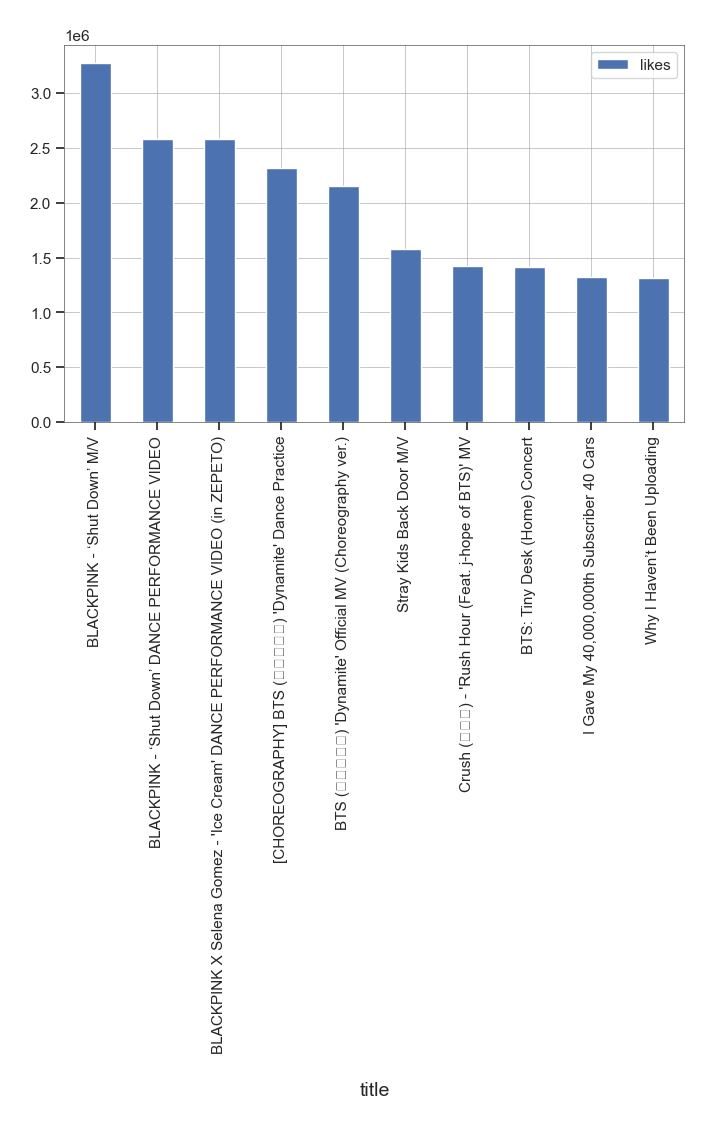

In [15]:
df.sort_values(by=["likes"], ascending=False).head(10).plot(y="likes", x="title", kind="bar")

In [16]:
len(6)
len(["ag", "aaj"])

TypeError: object of type 'int' has no len()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2234 entries, 0 to 2233
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           2234 non-null   object
 1   title              2234 non-null   object
 2   publishedAt        2234 non-null   object
 3   channelId          2234 non-null   object
 4   channelTitle       2234 non-null   object
 5   categoryId         2234 non-null   int64 
 6   trending_date      2234 non-null   object
 7   tags               2234 non-null   object
 8   view_count         2234 non-null   int64 
 9   likes              2234 non-null   int64 
 10  dislikes           2234 non-null   int64 
 11  comment_count      2234 non-null   int64 
 12  thumbnail_link     2234 non-null   object
 13  comments_disabled  2234 non-null   bool  
 14  ratings_disabled   2234 non-null   bool  
 15  description        2217 non-null   object
dtypes: bool(2), int64(5), object(9)
memory usa

F:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


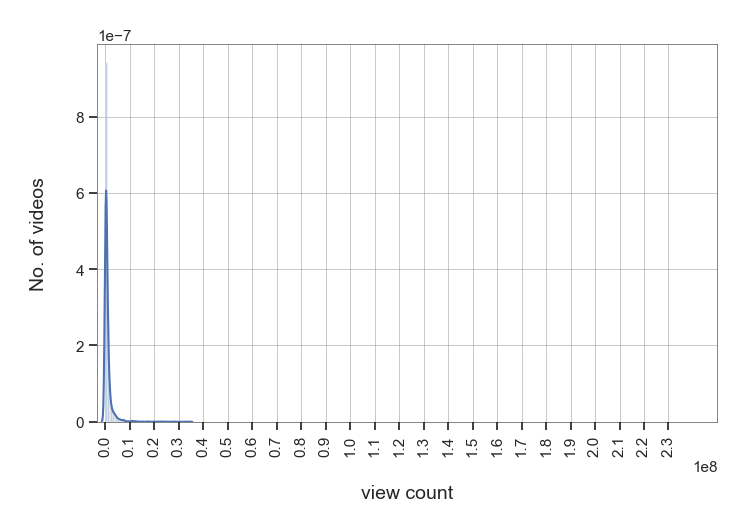

In [18]:
# views all
fig, ax = plt.subplots()
_ = sns.distplot(df["view_count"], ax=ax)
_ = ax.set(xlabel="view count", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

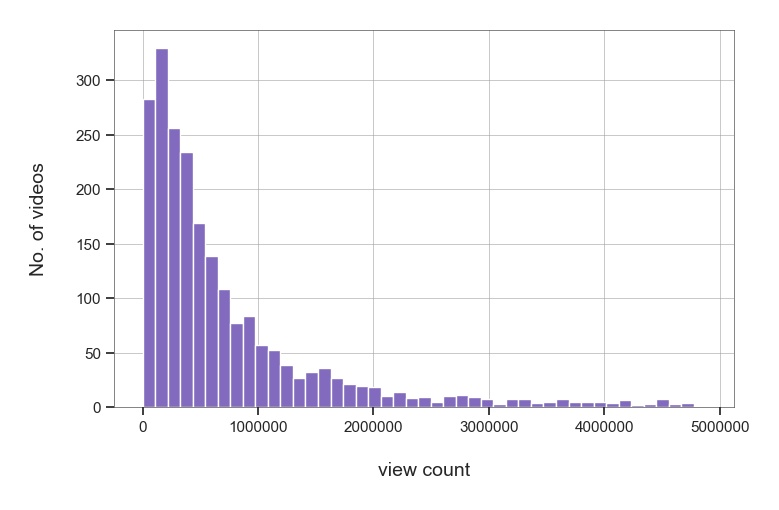

In [45]:
# views all
fig, ax = plt.subplots()
_ = sns.distplot(df[df["view_count"] <= 5000000]["view_count"], kde=False, 
                 color=GRAPH_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="view count", ylabel="No. of videos")
ax.ticklabel_format(useOffset=False, style='plain')

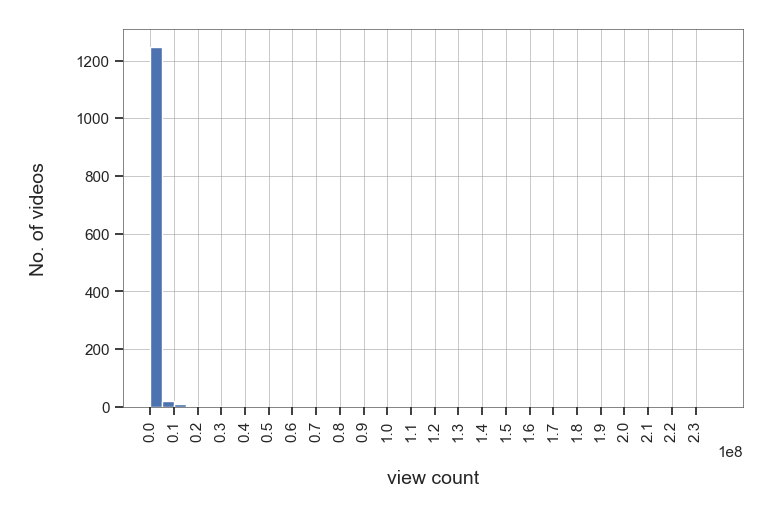

In [22]:
# views 2020
fig, ax = plt.subplots()
_ = sns.distplot(df_2020["view_count"], kde=False, 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="view count", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

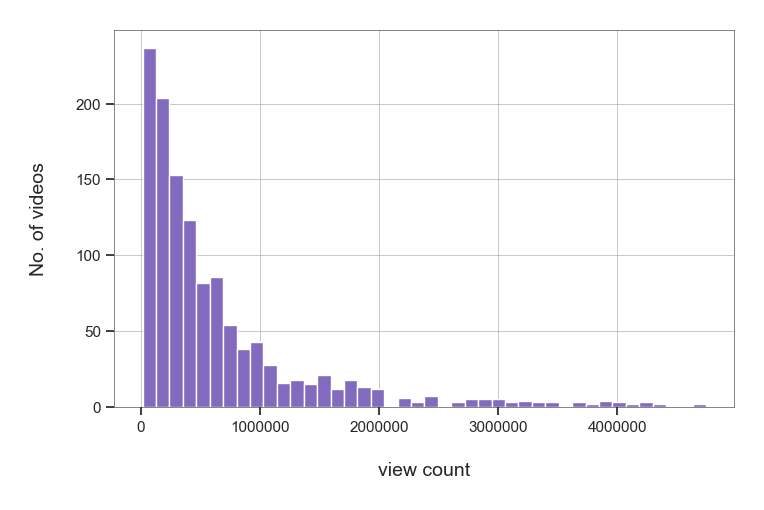

In [44]:
# views 2020
fig, ax = plt.subplots()
_ = sns.distplot(df_2020[df_2020["view_count"] <= 5000000]["view_count"], kde=False, 
                 color=GRAPH_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="view count", ylabel="No. of videos")
ax.ticklabel_format(useOffset=False, style='plain')

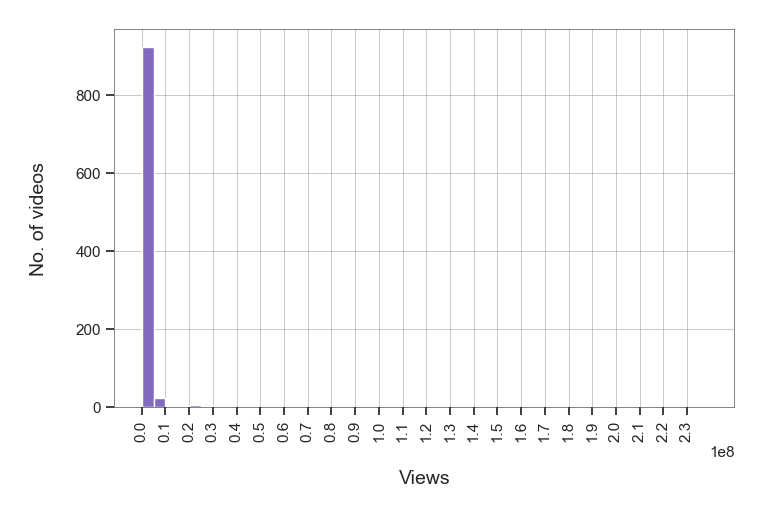

In [20]:
# views 2022
fig, ax = plt.subplots()
_ = sns.distplot(df_2022["view_count"], kde=False, color=GRAPH_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

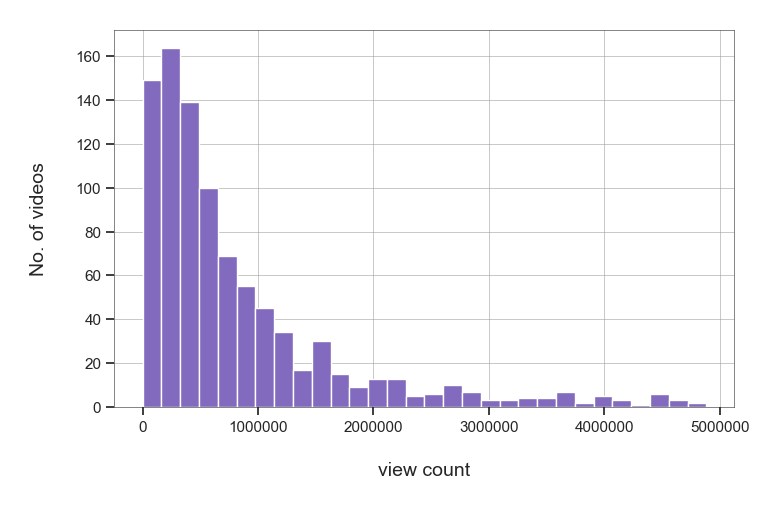

In [46]:
# views 2022
fig, ax = plt.subplots()
_ = sns.distplot(df_2022[df_2022["view_count"] <= 5000000]["view_count"], kde=False, 
                 color=GRAPH_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="view count", ylabel="No. of videos")
ax.ticklabel_format(useOffset=False, style='plain')

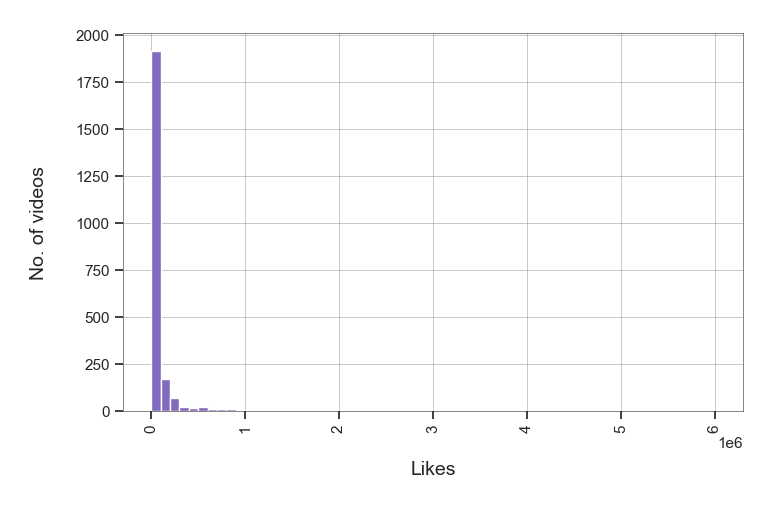

In [23]:
#likes all
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 color=GRAPH_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

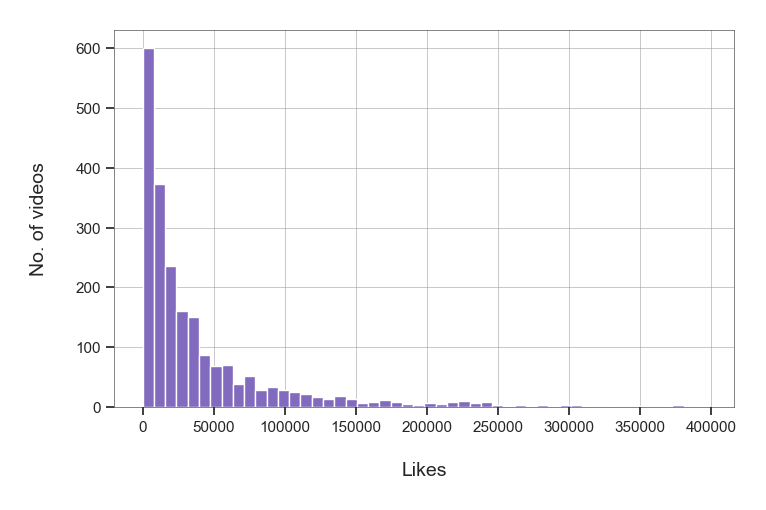

In [24]:
# likes all
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 400000]["likes"], kde=False, 
                 color=GRAPH_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

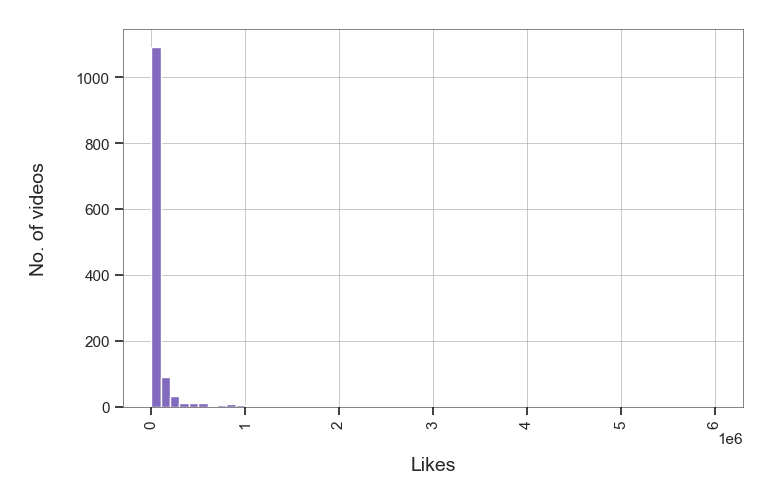

In [25]:
#likes 2020
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df_2020["likes"], kde=False, 
                 color=GRAPH_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

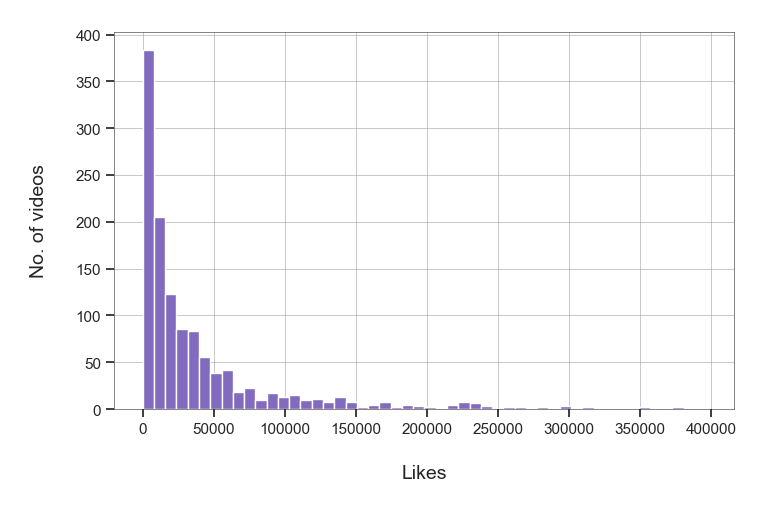

In [47]:
# likes 2020
fig, ax = plt.subplots()
_ = sns.distplot(df_2020[df_2020["likes"] <= 400000]["likes"], kde=False, 
                 color=GRAPH_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

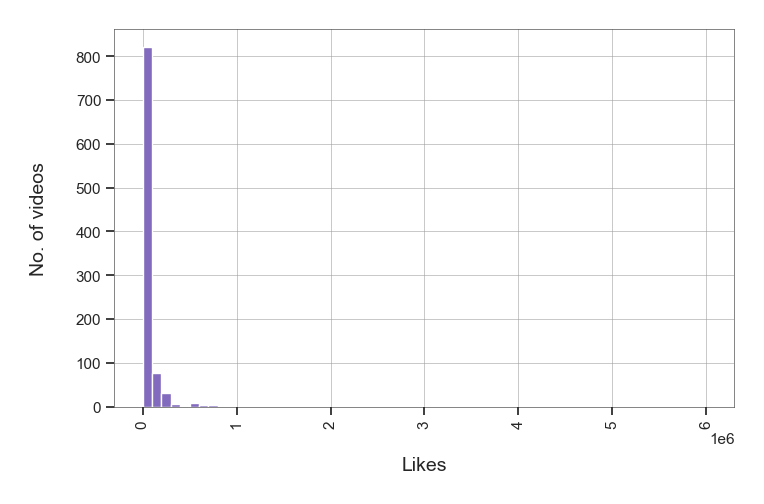

In [27]:
#likes 2022
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df_2022["likes"], kde=False, 
                 color=GRAPH_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

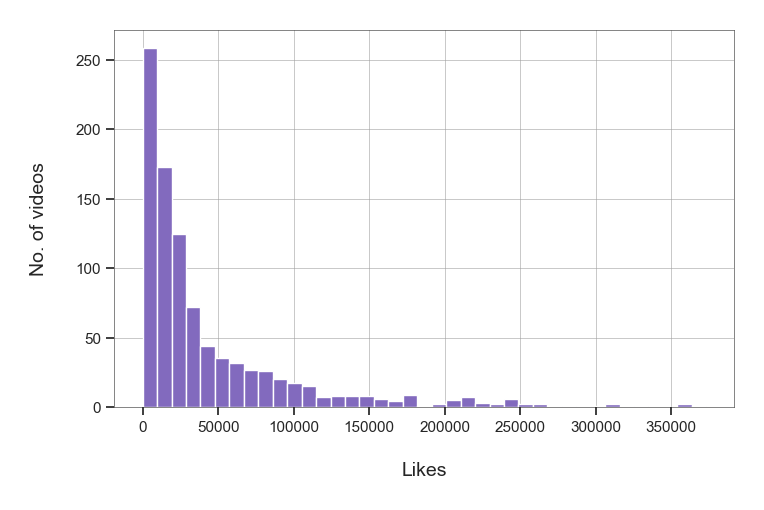

In [48]:
# likes 2022
fig, ax = plt.subplots()
_ = sns.distplot(df_2022[df_2022["likes"] <= 400000]["likes"], kde=False, 
                 color=GRAPH_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

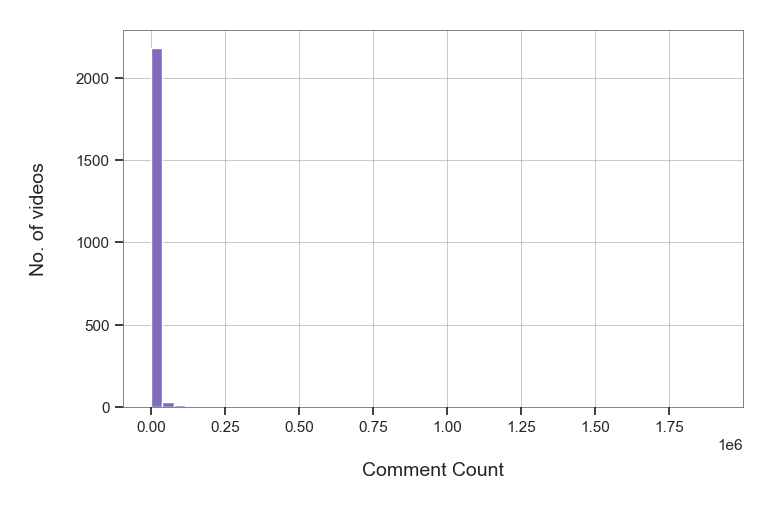

In [29]:
#all comment
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, rug=False, 
                 color=GRAPH_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

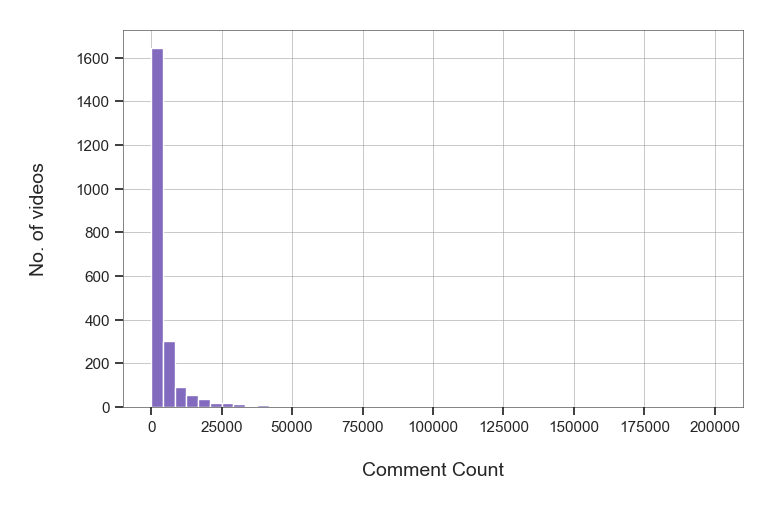

In [30]:
#all comment
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 70000]["comment_count"], kde=False, rug=False, 
                 color=GRAPH_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

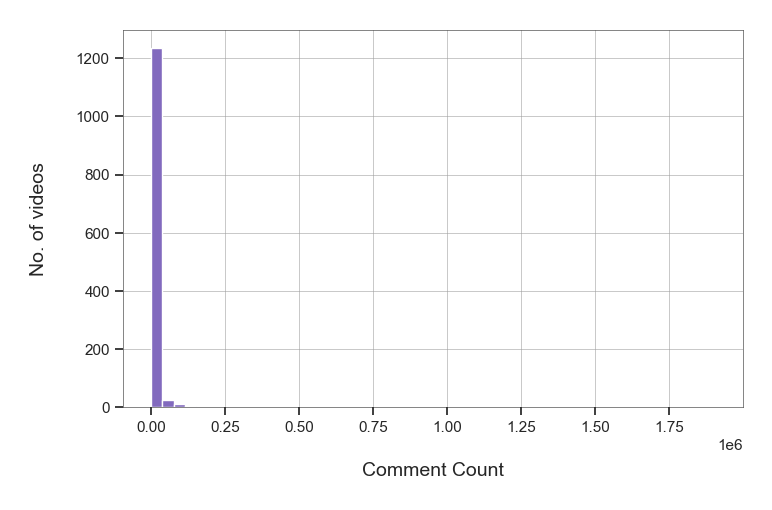

In [31]:
#2020 comment
fig, ax = plt.subplots()
_ = sns.distplot(df_2020["comment_count"], kde=False, rug=False, 
                 color=GRAPH_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

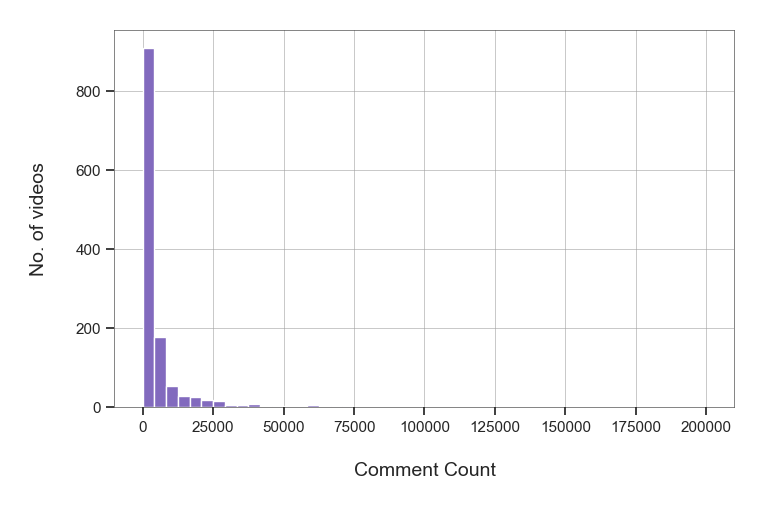

In [32]:
#2020 comment
fig, ax = plt.subplots()
_ = sns.distplot(df_2020[df_2020["comment_count"] < 70000]["comment_count"], kde=False, rug=False, 
                 color=GRAPH_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

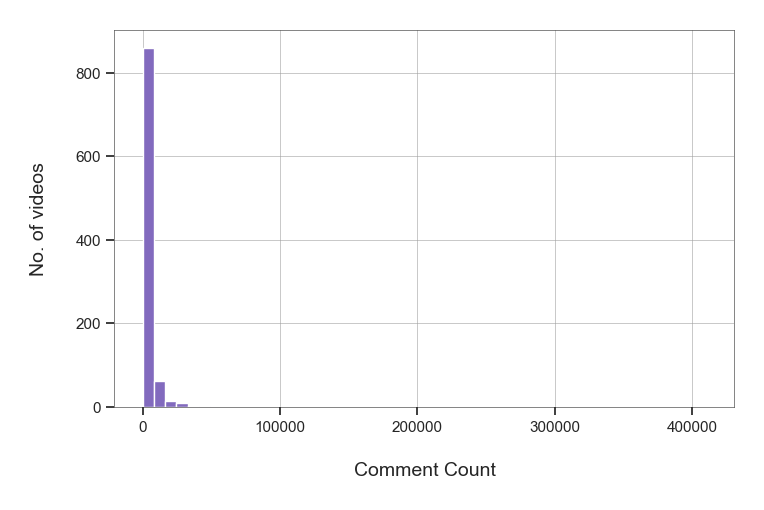

In [33]:
#2022 comment
fig, ax = plt.subplots()
_ = sns.distplot(df_2022["comment_count"], kde=False, rug=False, 
                 color=GRAPH_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

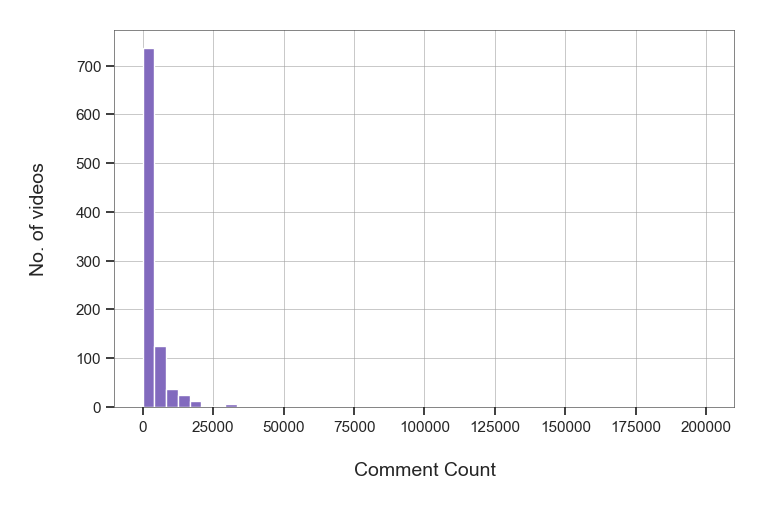

In [34]:
#2022 comment
fig, ax = plt.subplots()
_ = sns.distplot(df_2022[df_2022["comment_count"] < 70000]["comment_count"], kde=False, rug=False, 
                 color=GRAPH_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

In [33]:
df[df['comment_count'] < 4000]['comment_count'].count() / df['comment_count'].count() * 100

73.00805729632945

In [26]:
df_2020[df_2020['comment_count'] < 4000]['comment_count'].count() / df_2020['comment_count'].count() * 100

70.4225352112676

In [25]:
df_2022[df_2022['comment_count'] < 4000]['comment_count'].count() / df_2022['comment_count'].count() * 100

76.4644351464435

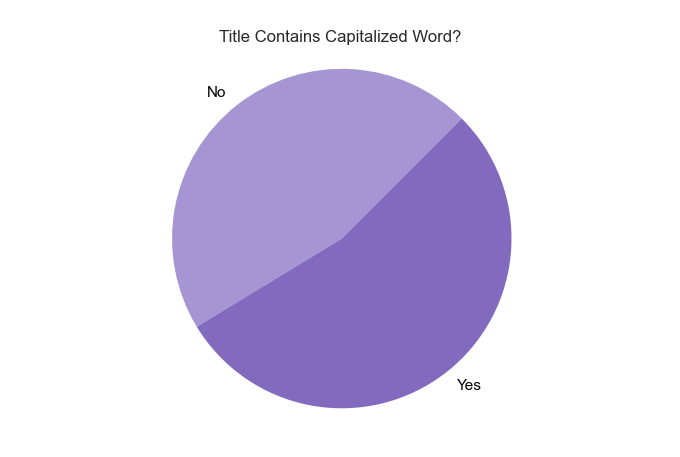

In [35]:
# comment capitalisation all
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#a595d3', '#826abe'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

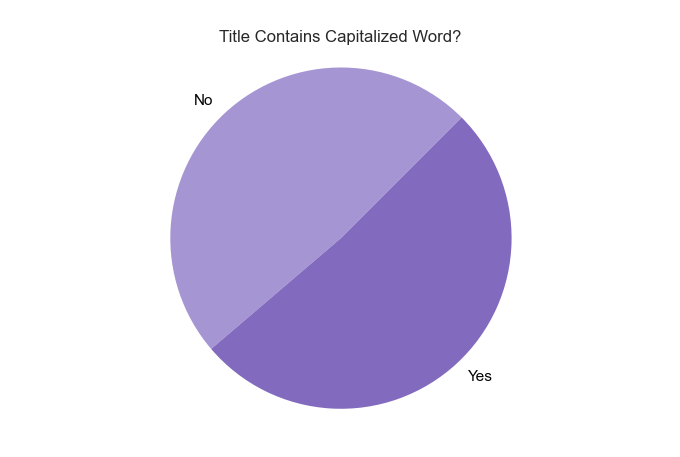

In [27]:
# comment capitalisation 2020
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df_2020["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#a595d3', '#826abe'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

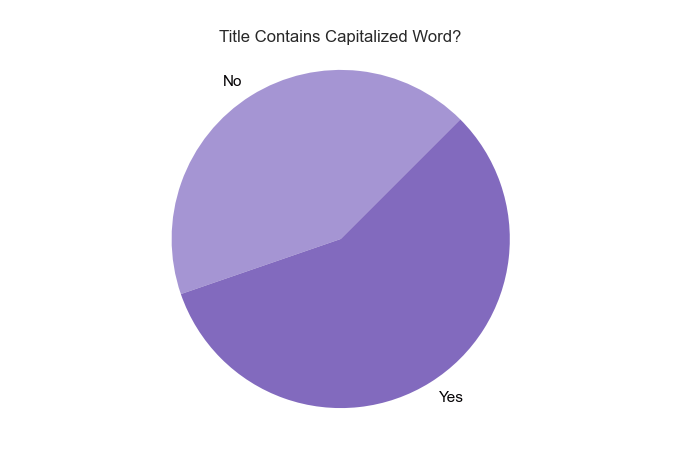

In [28]:
# comment capitalisation 2022
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df_2022["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#a595d3', '#826abe'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

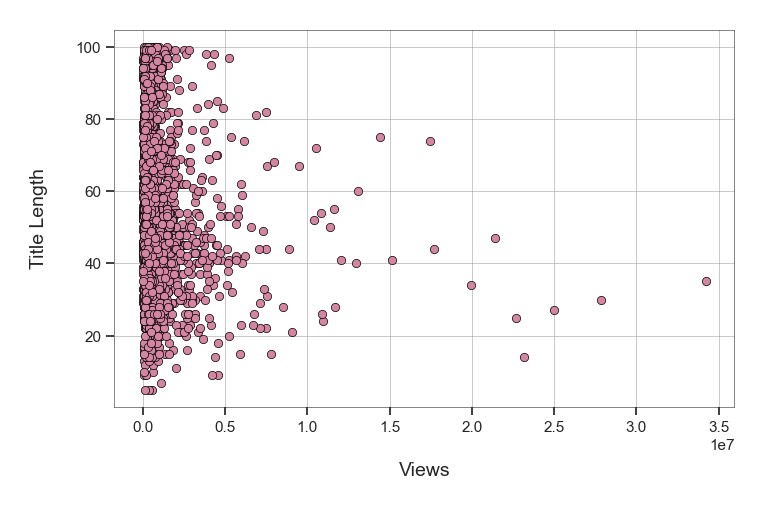

In [10]:
# title length vs views all
fig, ax = plt.subplots()
_ = ax.scatter(x=df['view_count'], y=df['title_length'], color=GRAPH_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

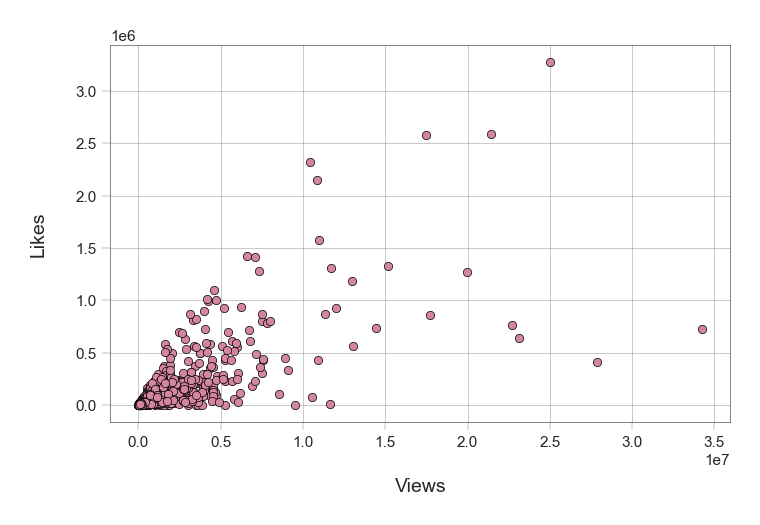

In [43]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['view_count'], y=df['likes'], color=GRAPH_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

In [16]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(35)

[('|', 789),
 ('-', 502),
 ('The', 268),
 ('the', 227),
 ('I', 174),
 ('&', 169),
 ('to', 155),
 ('Highlights', 149),
 ('in', 142),
 ('of', 141),
 ('and', 127),
 ('(Official', 117),
 ('Video)', 108),
 ('a', 106),
 ('2020', 103),
 ('A', 96),
 ('vs', 78),
 ('To', 77),
 ('with', 73),
 ('My', 69),
 ('Trailer', 69),
 ('on', 68),
 ('League', 66),
 ('for', 65),
 ('2', 63),
 ('Music', 60),
 ('Official', 54),
 ('THE', 50),
 ('In', 49),
 ('1', 48),
 ('2022', 47),
 ('Man', 44),
 ('at', 42),
 ('News', 42),
 ('New', 41)]

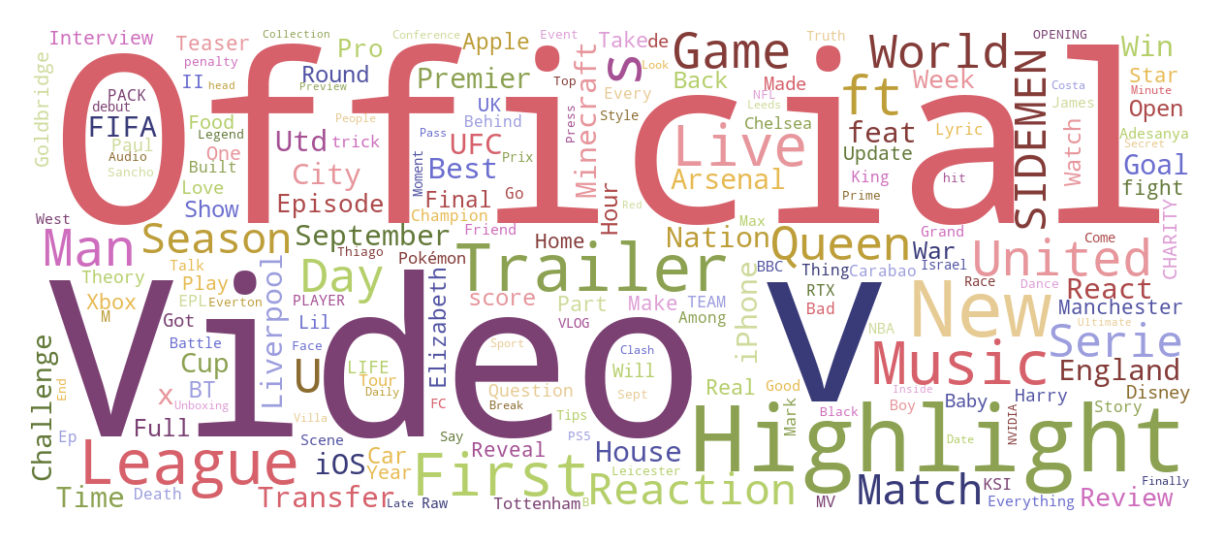

In [54]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

In [17]:
# most common words 2020
title_words = list(df_2020["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(35)

[('|', 455),
 ('-', 305),
 ('The', 151),
 ('&', 108),
 ('the', 106),
 ('2020', 103),
 ('Highlights', 89),
 ('to', 87),
 ('in', 73),
 ('and', 70),
 ('(Official', 69),
 ('Video)', 63),
 ('I', 62),
 ('a', 60),
 ('A', 56),
 ('of', 51),
 ('vs', 50),
 ('on', 44),
 ('for', 44),
 ('with', 43),
 ('To', 39),
 ('My', 38),
 ('2', 37),
 ('Music', 35),
 ('Man', 34),
 ('Trailer', 33),
 ('September', 32),
 ('News', 32),
 ('League', 32),
 ('United', 30),
 ('Series', 30),
 ('Official', 29),
 ('Transfer', 29),
 ('First', 28),
 ('1', 27)]

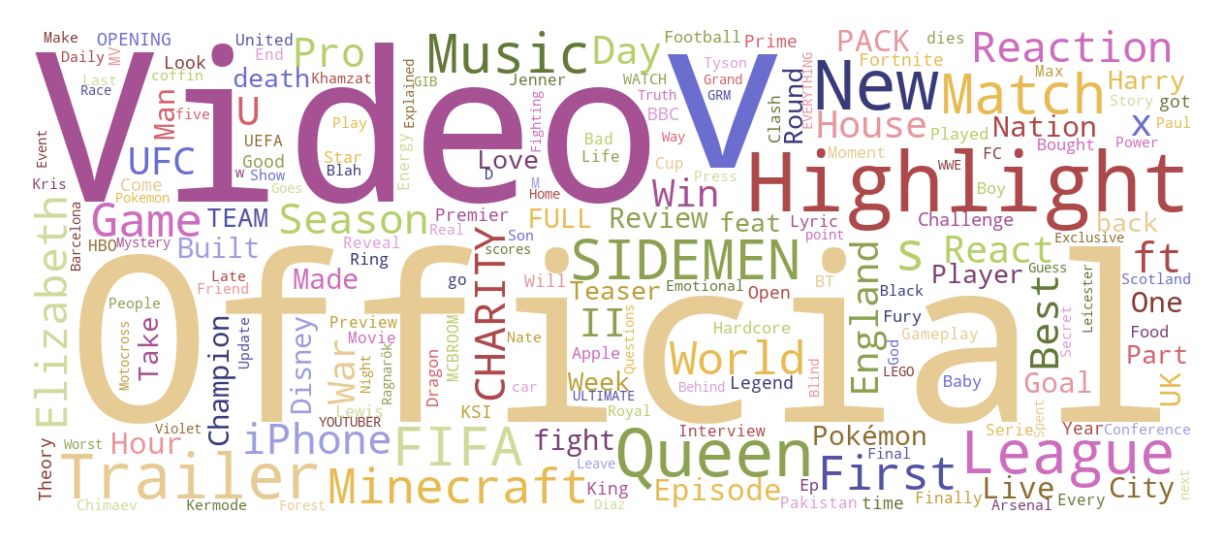

In [40]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

In [18]:
# most common words 2022
title_words = list(df_2022["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(35)

[('|', 334),
 ('-', 197),
 ('the', 121),
 ('The', 117),
 ('I', 112),
 ('of', 90),
 ('in', 69),
 ('to', 68),
 ('&', 61),
 ('Highlights', 60),
 ('and', 57),
 ('(Official', 48),
 ('2022', 47),
 ('a', 46),
 ('Video)', 45),
 ('A', 40),
 ('To', 38),
 ('Trailer', 36),
 ('League', 34),
 ('My', 31),
 ('with', 30),
 ('Queen', 30),
 ('In', 29),
 ('FIFA', 29),
 ('vs', 28),
 ('at', 27),
 ('2', 26),
 ('Music', 25),
 ('Official', 25),
 ('on', 24),
 ('SIDEMEN', 23),
 ('THE', 23),
 ('v', 23),
 ('23', 22),
 ('Is', 22)]

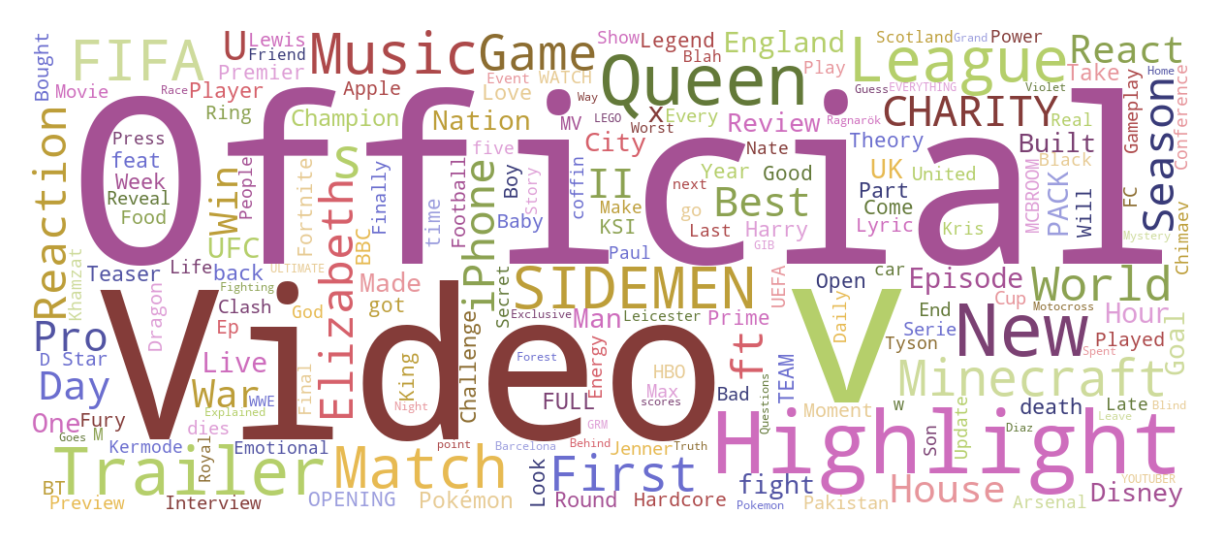

In [41]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

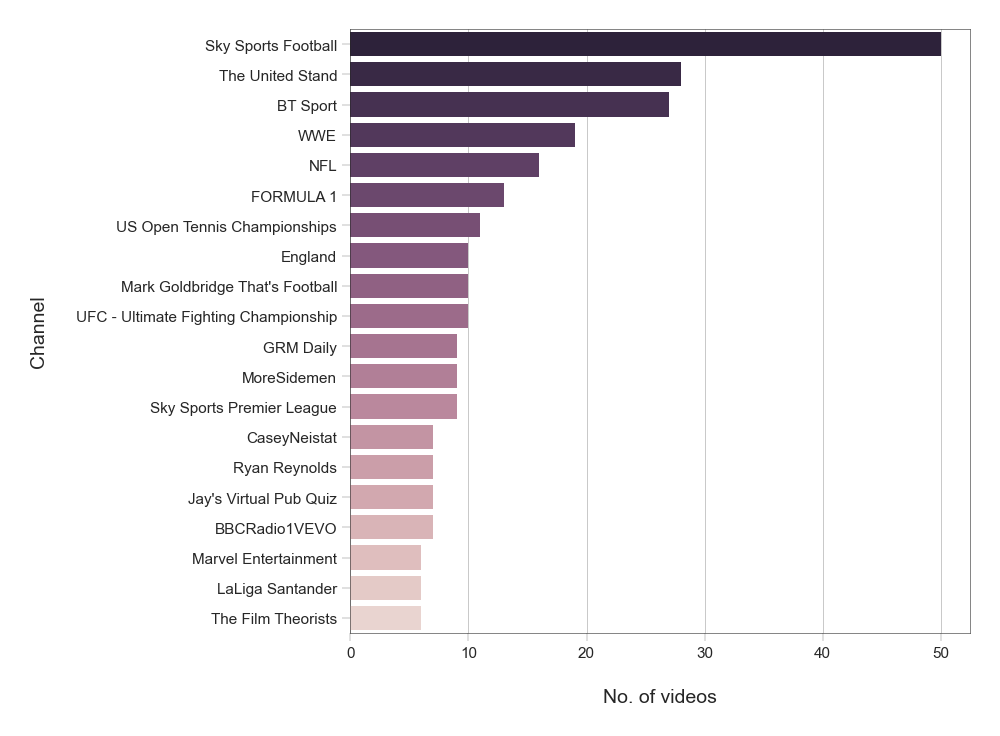

In [57]:
# most trending channels all
cdf = df.groupby("channelTitle").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channelTitle", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

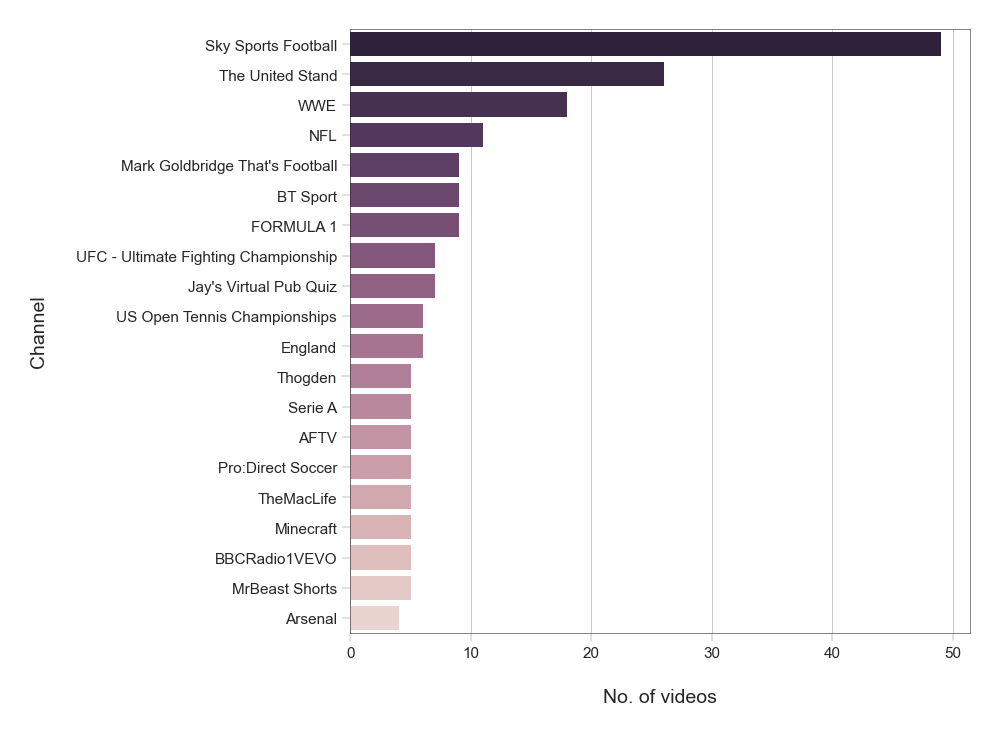

In [43]:
# most trending channels 2020
cdf = df_2020.groupby("channelTitle").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channelTitle", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

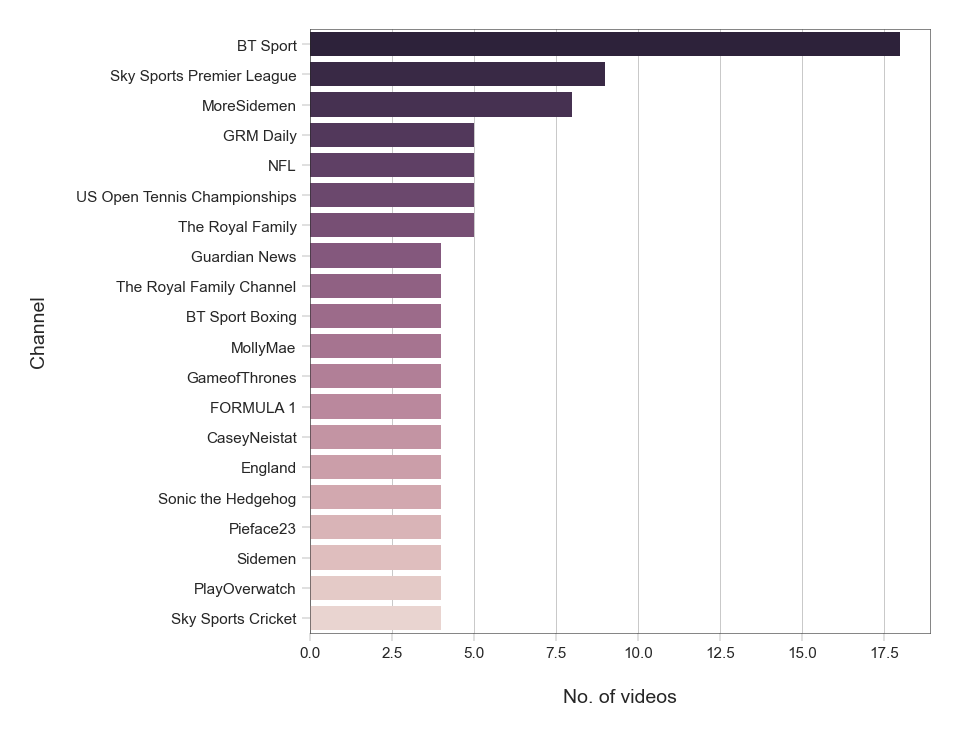

In [45]:
# most trending channels 2022
cdf = df_2022.groupby("channelTitle").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channelTitle", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

In [47]:
df["publishing_day"] = df["publishedAt"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publishedAt"].apply(lambda x: x[11:13])
df.drop(labels='publishedAt', axis=1, inplace=True)
df_2020["publishing_day"] = df_2020["publishedAt"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df_2020["publishing_hour"] = df_2020["publishedAt"].apply(lambda x: x[11:13])
df_2020.drop(labels='publishedAt', axis=1, inplace=True)
df_2022["publishing_day"] = df_2022["publishedAt"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df_2022["publishing_hour"] = df_2022["publishedAt"].apply(lambda x: x[11:13])
df_2022.drop(labels='publishedAt', axis=1, inplace=True)

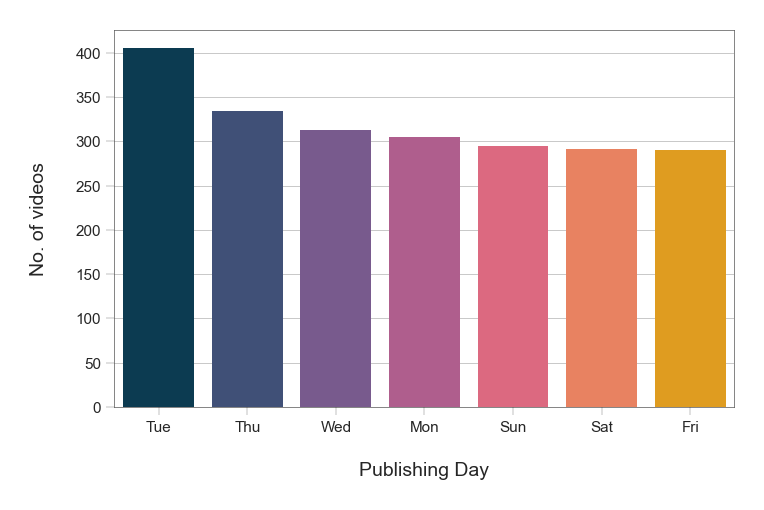

In [62]:
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

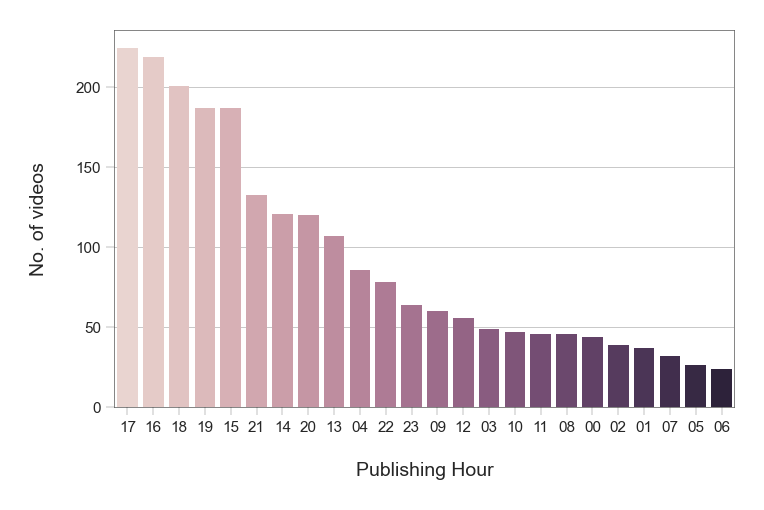

In [63]:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

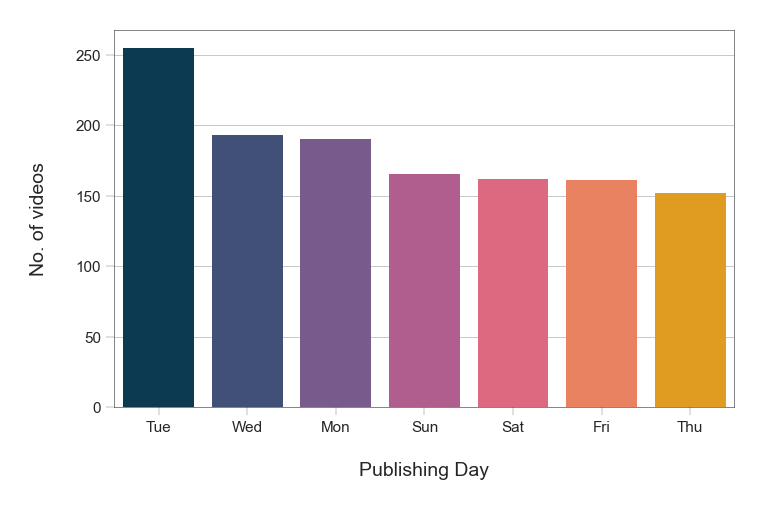

In [48]:
# publishing day 2020
cdf = df_2020["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

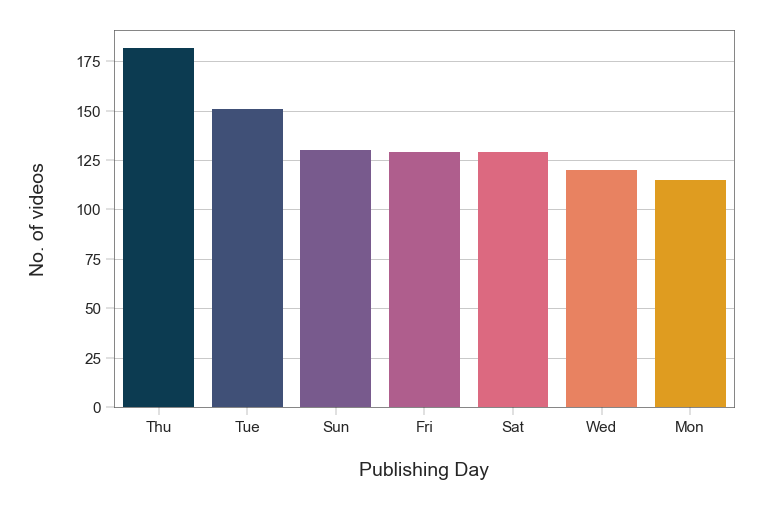

In [49]:
# publishing day 2022
cdf = df_2022["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

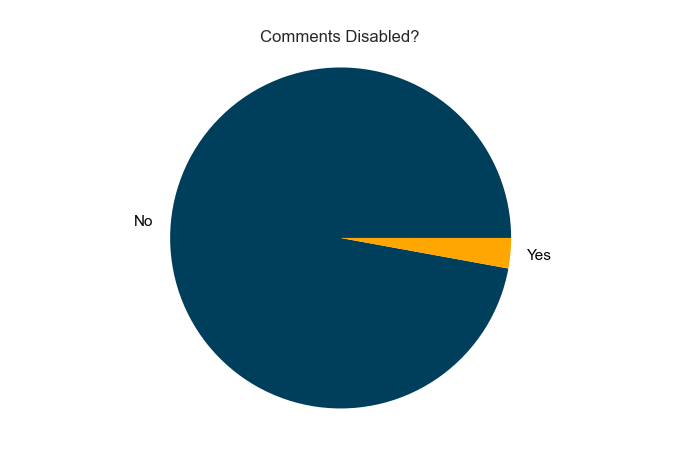

In [64]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')

In [65]:
df["comments_disabled"].value_counts(normalize=True)

False   0.97
True    0.03
Name: comments_disabled, dtype: float64

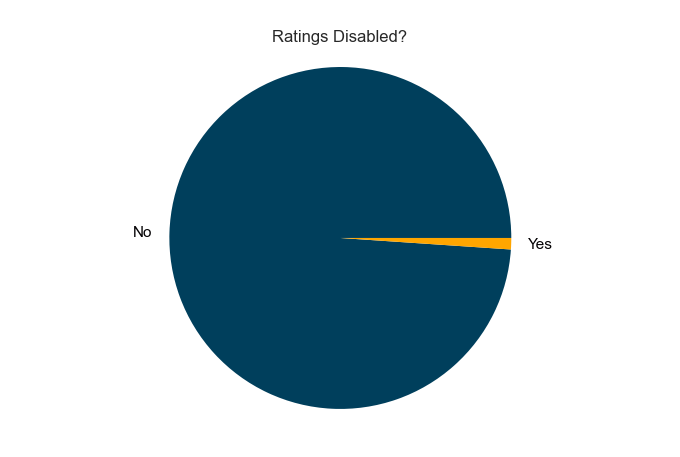

In [66]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
            colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')

In [67]:
df["ratings_disabled"].value_counts()

False    2210
True       24
Name: ratings_disabled, dtype: int64

In [68]:
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

8